In [373]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
import keras
from tensorflow.keras.layers import *

# 데이터 로드

In [374]:
data = pd.read_csv('../datasets/prep_total_2.csv', index_col= 0, encoding= 'cp949')
data = data[['검진 시 연령','체중', '허리둘레', 'BMI','수축기혈압', '이완기혈압']]
data.reset_index(inplace= True)
data.rename(columns={'고유값':'일련번호'}, inplace=True)
data.dropna(axis=0, inplace= True)

# 그룹화

In [375]:
grouped = data.groupby(['일련번호'])
grouped_df = {}
for key, group in grouped:
    grouped_df[key] = group

# 스케일링

In [376]:
from sklearn.preprocessing import MinMaxScaler

In [377]:
minmaxscaler = MinMaxScaler()
# Groupby한 것을 잘라서 각각 스케일링하고 시퀀스작업도 각각해야함
X_list = []
Y_list = []
for key in grouped_df.keys():
    # 스케일링
    scaled_data = minmaxscaler.fit_transform(grouped_df[key][['검진 시 연령','체중', '허리둘레', 'BMI',
                                                              '수축기혈압', '이완기혈압']])
    
    # 시퀀스작업
    for i in range(0, len(scaled_data) - 2):
        _x = scaled_data[i : i + 2]
        _y = scaled_data[i + 2][4]
        X_list.append(_x)
        Y_list.append(_y)

In [378]:
sequence_X = np.array(X_list)
sequence_Y = np.array(Y_list)
print(sequence_X.shape)
print(sequence_Y.shape)

(847, 2, 6)
(847,)


# K_Fold_cross_validataion

In [379]:
from sklearn.model_selection import KFold

In [380]:
kf = KFold(n_splits=5)
kf.get_n_splits(sequence_X)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


# Modeling

In [381]:
model = Sequential()
model.add(Conv1D(32, kernel_size=5, input_shape = (sequence_X.shape[1], sequence_X.shape[2]), padding= 'same', activation= 'relu'))      
model.add(MaxPool1D(padding='same', pool_size=2))
model.add(Dropout(0.025))
model.add(Conv1D(32, kernel_size=3, padding= 'same', activation= 'relu'))
model.add(MaxPool1D(padding='same', pool_size=1))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.55))
model.add(Dense(1, activation = 'sigmoid'))
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience= 20)
model.compile(loss= 'mse', optimizer= 'adam')
print(model.summary())

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_52 (Conv1D)           (None, 2, 32)             992       
_________________________________________________________________
max_pooling1d_52 (MaxPooling (None, 1, 32)             0         
_________________________________________________________________
dropout_78 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
conv1d_53 (Conv1D)           (None, 1, 32)             3104      
_________________________________________________________________
max_pooling1d_53 (MaxPooling (None, 1, 32)             0         
_________________________________________________________________
dropout_79 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 32)              

# Learning

Train on 677 samples, validate on 170 samples
Epoch 1/500
677/677 [==============================] - 1s 2ms/sample - loss: 0.1052 - val_loss: 0.0972
Epoch 2/500
677/677 [==============================] - 0s 214us/sample - loss: 0.1038 - val_loss: 0.0973
Epoch 3/500
677/677 [==============================] - 0s 211us/sample - loss: 0.1036 - val_loss: 0.0974
Epoch 4/500
677/677 [==============================] - 0s 217us/sample - loss: 0.1032 - val_loss: 0.0970
Epoch 5/500
677/677 [==============================] - 0s 224us/sample - loss: 0.1035 - val_loss: 0.0965
Epoch 6/500
677/677 [==============================] - 0s 215us/sample - loss: 0.1032 - val_loss: 0.0966
Epoch 7/500
677/677 [==============================] - 0s 136us/sample - loss: 0.1030 - val_loss: 0.0972
Epoch 8/500
677/677 [==============================] - 0s 133us/sample - loss: 0.1031 - val_loss: 0.0961
Epoch 9/500
677/677 [==============================] - 0s 136us/sample - loss: 0.1029 - val_loss: 0.0961
Epoch 10/50

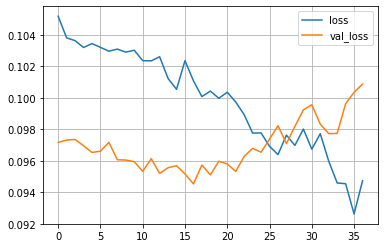

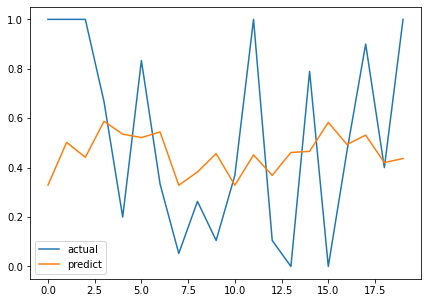

Train on 677 samples, validate on 170 samples
Epoch 1/500
677/677 [==============================] - 0s 155us/sample - loss: 0.0943 - val_loss: 0.0933
Epoch 2/500
677/677 [==============================] - 0s 152us/sample - loss: 0.0946 - val_loss: 0.0941
Epoch 3/500
677/677 [==============================] - 0s 152us/sample - loss: 0.0931 - val_loss: 0.0965
Epoch 4/500
677/677 [==============================] - 0s 149us/sample - loss: 0.0908 - val_loss: 0.0979
Epoch 5/500
677/677 [==============================] - 0s 146us/sample - loss: 0.0927 - val_loss: 0.0970
Epoch 6/500
677/677 [==============================] - 0s 144us/sample - loss: 0.0919 - val_loss: 0.0989
Epoch 7/500
677/677 [==============================] - 0s 149us/sample - loss: 0.0910 - val_loss: 0.0998
Epoch 8/500
677/677 [==============================] - 0s 144us/sample - loss: 0.0923 - val_loss: 0.0977
Epoch 9/500
677/677 [==============================] - 0s 147us/sample - loss: 0.0910 - val_loss: 0.0985
Epoch 10/

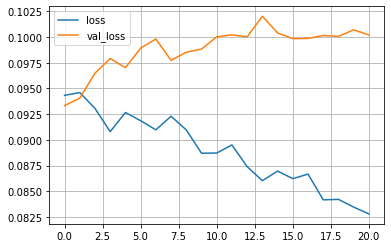

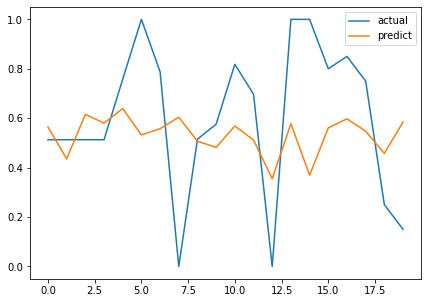

Train on 678 samples, validate on 169 samples
Epoch 1/500
678/678 [==============================] - 0s 152us/sample - loss: 0.0884 - val_loss: 0.0806
Epoch 2/500
678/678 [==============================] - 0s 149us/sample - loss: 0.0861 - val_loss: 0.0811
Epoch 3/500
678/678 [==============================] - 0s 147us/sample - loss: 0.0854 - val_loss: 0.0811
Epoch 4/500
678/678 [==============================] - 0s 146us/sample - loss: 0.0838 - val_loss: 0.0825
Epoch 5/500
678/678 [==============================] - 0s 147us/sample - loss: 0.0845 - val_loss: 0.0821
Epoch 6/500
678/678 [==============================] - 0s 146us/sample - loss: 0.0818 - val_loss: 0.0834
Epoch 7/500
678/678 [==============================] - 0s 146us/sample - loss: 0.0845 - val_loss: 0.0823
Epoch 8/500
678/678 [==============================] - 0s 141us/sample - loss: 0.0820 - val_loss: 0.0853
Epoch 9/500
678/678 [==============================] - 0s 144us/sample - loss: 0.0792 - val_loss: 0.0863
Epoch 10/

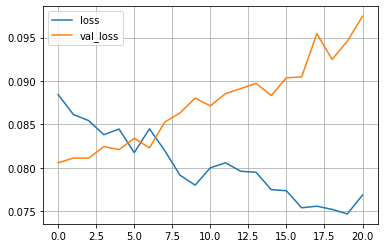

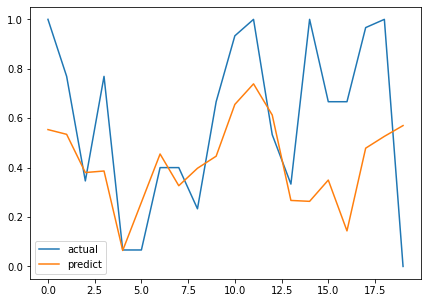

Train on 678 samples, validate on 169 samples
Epoch 1/500
678/678 [==============================] - 0s 151us/sample - loss: 0.0798 - val_loss: 0.0751
Epoch 2/500
678/678 [==============================] - 0s 157us/sample - loss: 0.0788 - val_loss: 0.0766
Epoch 3/500
678/678 [==============================] - 0s 150us/sample - loss: 0.0761 - val_loss: 0.0843
Epoch 4/500
678/678 [==============================] - 0s 146us/sample - loss: 0.0772 - val_loss: 0.0840
Epoch 5/500
678/678 [==============================] - 0s 157us/sample - loss: 0.0787 - val_loss: 0.0820
Epoch 6/500
678/678 [==============================] - 0s 144us/sample - loss: 0.0756 - val_loss: 0.0843
Epoch 7/500
678/678 [==============================] - 0s 143us/sample - loss: 0.0761 - val_loss: 0.0821
Epoch 8/500
678/678 [==============================] - 0s 150us/sample - loss: 0.0759 - val_loss: 0.0833
Epoch 9/500
678/678 [==============================] - 0s 141us/sample - loss: 0.0751 - val_loss: 0.0835
Epoch 10/

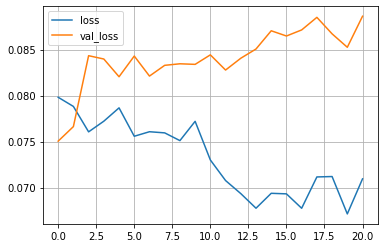

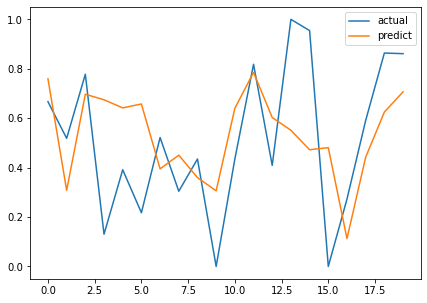

Train on 678 samples, validate on 169 samples
Epoch 1/500
678/678 [==============================] - 0s 237us/sample - loss: 0.0738 - val_loss: 0.0636
Epoch 2/500
678/678 [==============================] - 0s 212us/sample - loss: 0.0758 - val_loss: 0.0646
Epoch 3/500
678/678 [==============================] - 0s 243us/sample - loss: 0.0736 - val_loss: 0.0680
Epoch 4/500
678/678 [==============================] - 0s 210us/sample - loss: 0.0709 - val_loss: 0.0666
Epoch 5/500
678/678 [==============================] - 0s 194us/sample - loss: 0.0668 - val_loss: 0.0694
Epoch 6/500
678/678 [==============================] - 0s 218us/sample - loss: 0.0656 - val_loss: 0.0677
Epoch 7/500
678/678 [==============================] - 0s 209us/sample - loss: 0.0691 - val_loss: 0.0734
Epoch 8/500
678/678 [==============================] - 0s 141us/sample - loss: 0.0670 - val_loss: 0.0732
Epoch 9/500
678/678 [==============================] - 0s 132us/sample - loss: 0.0677 - val_loss: 0.0723
Epoch 10/

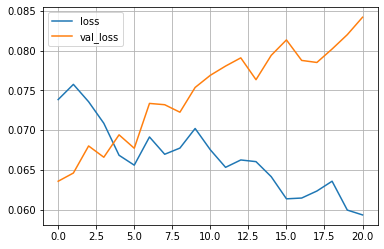

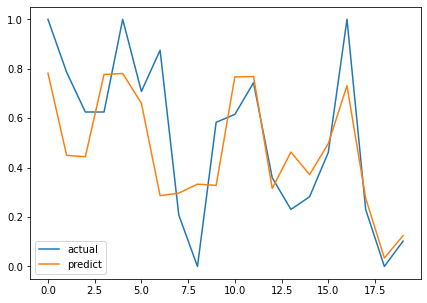

In [382]:
for train_index, test_index in kf.split(sequence_X):
    X_train, X_test = sequence_X[train_index], sequence_X[test_index]
    Y_train, Y_test = sequence_Y[train_index], sequence_Y[test_index]

    fit_hist = model.fit(X_train, Y_train, epochs = 500, validation_data= (X_test, Y_test), shuffle= False, callbacks= [early_stop])

    plt.plot(fit_hist.history['loss'], label= 'loss')
    plt.plot(fit_hist.history['val_loss'], label= 'val_loss')
    plt.legend()
    plt.grid()
    plt.show()

    predict = model.predict(X_test)
    fig = plt.figure(figsize = (7,5))
    plt.plot(Y_test[-20:], label= 'actual')
    plt.plot(predict[-20:], label= 'predict')
    plt.legend()
    plt.show()

In [383]:
# fig.savefig('../datasets/bp_graph/age_weight_waist_bmi_bp/2개씩.png')

# Test

In [384]:
'''
UI에서는 내 2년치 건강검진 데이터 입력하면
model 거쳐서
예측
'''

'\nUI에서는 내 2년치 건강검진 데이터 입력하면\nmodel 거쳐서\n예측\n'

In [385]:
test = pd.read_excel('../datasets/prep_test.xlsx', index_col= 0)
test_data = test[['검진 시 연령','체중', '허리둘레', 'BMI','수축기혈압', '이완기혈압']]
test_data.rename(columns={'고유값':'일련번호'}, inplace=True)
test_data.dropna(axis=0, inplace= True)

c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\pandas\core\frame.py:4298: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [386]:
scaled_test_data = minmaxscaler.fit_transform(test_data)
X_sequence = []
Y_sequence = []
for i in range(0, len(scaled_test_data) - 2):
    _x = scaled_test_data[i : i + 2]
    _y = scaled_test_data[i + 2][4]
    X_sequence.append(_x)
    Y_sequence.append(_y)

In [387]:
sequence_X = np.array(X_sequence)
sequence_Y = np.array(Y_sequence)

In [388]:
predict = model.predict(sequence_X)

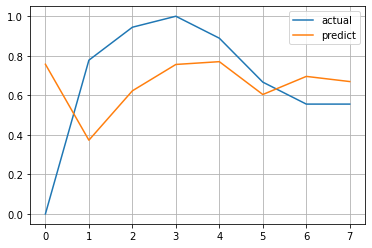

In [389]:
plt.plot(sequence_Y, label = 'actual')
plt.plot(predict, label = 'predict')
plt.legend()
plt.grid()
plt.show()